# Integration, Cointegration, and Stationarity

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Stationarity vs. Non-Stationarity

In [2]:
T = 100

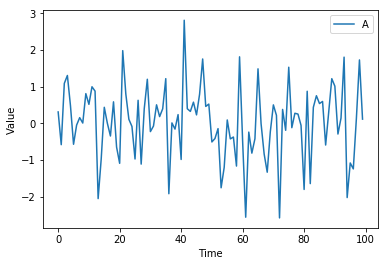

In [3]:
# series A
A = np.random.normal(0,1,T) 
plt.plot(A ,label='A')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

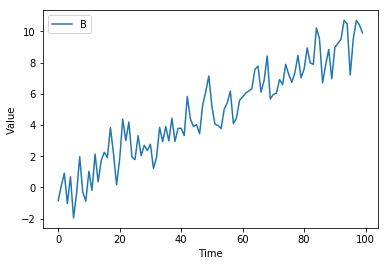

In [4]:
# series B
B = np.arange(T)*0.1 + np.random.normal(0,1,T) 
plt.plot(B, label='B')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

Stationarity is important in statistic, since many statistical tests require that the data being tested are stationary. 

## Test for stationarity

The stationarity can be tested by applying Augmented Dickey–Fuller test <br>
The null hypothesis for this test is that there is a unit root (i.e.: non-stationary).

In [5]:
from statsmodels.tsa.stattools import adfuller
# H_0: It is a non-stationary process
def test_stationary(process,significance=0.01):
    pvalue = adfuller(process)[1]
    if pvalue > significance:
        # accept H_0 (i.e it is non-stationary)
        print('It is likely non-stationary with p-value: {}.'.format(pvalue))
        return False
    else:
        # reject H_0 (i.e it is stationary)
        print('It is likely stationary with p-value: {}.'.format(pvalue))
        return True

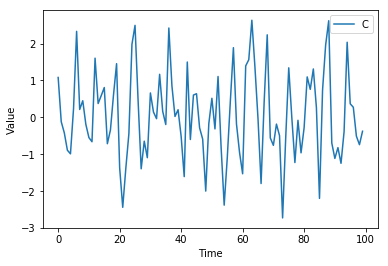

In [6]:
# Create a cyclic process.
C = np.cos(np.arange(T))+ np.random.normal(0,1,T) 
plt.plot(C, label='C')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend();

In [7]:
test_stationary(C)

It is likely stationary with p-value: 2.2065937003945515e-10.


True

## Order of Integration

We will note integration order-i as  $I(i)$ .<br>
Wold's theorem says that every covariance-stationary time series ${\displaystyle Y_{t}} Y_{{t}}$ can be written as the sum of two time series, one __deterministic__ and one __stochastic__.
Let say a time seris:
$$Y_t = \sum_{j=0}^\infty b_j \epsilon_{t-j} + \eta_t$$
where: <br>
* ϵ  is the stochastic part, $\epsilon_t = \hat Y_t - Y_t$ <br>
* bj  are the moving average weights of the innovation series <br>
* η  is a deterministic part

A time seris is $I(0)$  if  $$\sum_{k=0}^\infty |b_k|^2 < \infty$$

### Testing for  $I(0)$
In practice testing whether the sum of the autocorrelations is finite may not be possible. It is possible in a mathematical derivation, but when we have a finite set of data and a finite number of estimated autocorrelations, the sum will always be finite. Given this difficulty, tests for  I(0)  rely on stationarity implying the property. If we find that a series is stationary, then it must also be  I(0) . <br>
If one takes an  I(0)  series and cumulatively sums it (discrete integration), the new series will be  I(1) . Notice how this is related to the calculus concept of integration. The same relation applies in general, to get  I(n)  take an  I(0)  series and iteratively take the cumulative sum  n  times.

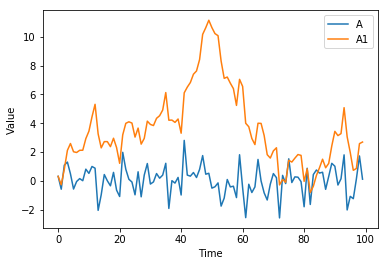

In [8]:
A1 = np.cumsum(A)

plt.plot(A, label='A')
plt.plot(A1, label='A1')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

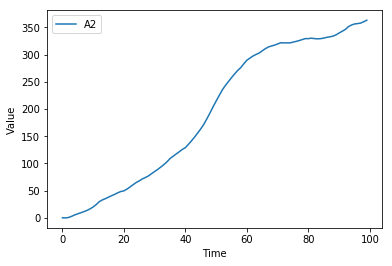

In [9]:
A2 = np.cumsum(A1)
plt.plot(A2, label='A2')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

### Breaking Down Orders of Integration
Conversely, to find the order of integration of a given series, we perform the inverse of a cumulative sum, which is the  Δ  or itemwise difference function. Specifically

$$(1-L) X_t = X_t - X_{t-1} = \Delta X$$
 
$$(1-L)^d X_t$$
 
In this case  L  is the lag operator. Sometimes also written as  B  for 'backshift'.  L  fetches the second to last elements in a time series, and  Lk  fetches the k-th to last elements. So

$$L X_t = X_{t-1}$$
 
and

$$(1-L) X_t = X_t - X_{t-1}$$
 
A series  Yt  is  I(1)  if the  Yt−Yt−1  is  I(0). In other words, if you take an  I(0)  series and cumulatively sum it, you should get an  I(1)  series.

Important Take-Away
Once all the math has settled, remember that any stationary series is  I(0)

## Real world example

In [10]:
from StockCrawler.StockCrawler import load_yahoo_quote
symbol = 'MSFT'
start_date='20140101'
end_date='20150101'
prices_df = load_yahoo_quote(symbol,start_date,end_date)
prices = prices_df[['Date','Close']]
X = prices['Close']


In [11]:
test_stationary(X)

It is likely non-stationary with p-value: 0.6866401929843102.


False

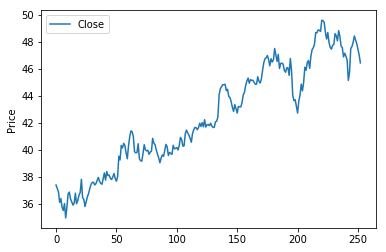

In [12]:
plt.plot(X.index, X.values)
plt.ylabel('Price')
plt.legend([X.name]);

It is likely stationary with p-value: 1.3728492414260707e-28.


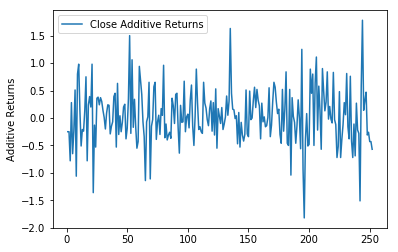

In [13]:
X1 = X.diff()[1:]
X1.name = X.name + ' Additive Returns'
test_stationary(X1)
plt.plot(X1.index, X1.values)
plt.ylabel('Additive Returns')
plt.legend([X1.name]);

It is likely stationary with p-value: 7.46769236103265e-29.


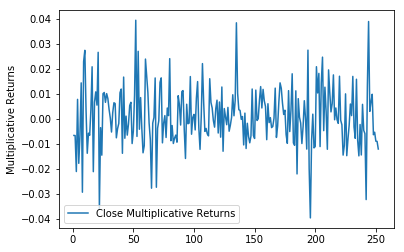

In [14]:
X1 = X.pct_change()[1:]
X1.name = X.name + ' Multiplicative Returns'
test_stationary(X1)
plt.plot(X1.index, X1.values)
plt.ylabel('Multiplicative Returns')
plt.legend([X1.name]);

### IMPORTANT NOTE
As always, you should not naively assume that because a time series is stationary in the past it will continue to be stationary in the future. 

## Cointegration
Let say a time seris:
$$Y = b_1X_1 + b_2X_2 + \dots + b_kX_k$$
If all ($X_1$,...,$X_k$) are  $I(1)$ , and some linear combination of them is  I(0)(like Y is $I(0)$) , we say the set of time series is cointegrated.

In [15]:
# Length of series
N = 100

# Generate a stationary random X1
X1 = np.random.normal(0, 1, N)
# Integrate it to make it I(1)
X1 = np.cumsum(X1)
X1 = pd.Series(X1)
X1.name = 'X1'

# Make an X2 that is X1 plus some noise
X2 = X1 + np.random.normal(0, 1, N)
X2.name = 'X2'

So, now, we have two dataset, X1 abd X2 are both $I(1)$ after cumsum.

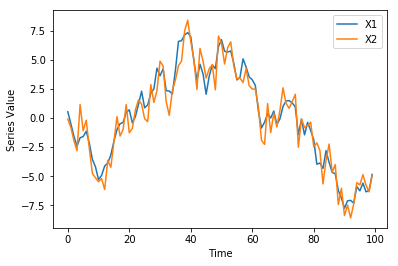

In [16]:
plt.plot(X1)
plt.plot(X2)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([X1.name, X2.name]);

In [17]:
Z = X2.diff()[1:] # so Z is I(0)
Z.name = 'Z'

test_stationary(Z);

It is likely stationary with p-value: 2.4662360025556845e-15.


It is likely stationary with p-value: 2.2271476057493386e-16.


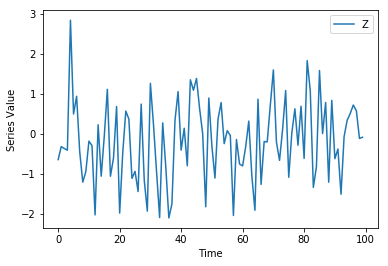

In [18]:
Z = X2 - X1 # so Z is I(0)
Z.name = 'Z'

plt.plot(Z)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend(['Z']);

test_stationary(Z);

### Test for cointegration
There are a bunch of ways to test for cointegration. This wikipedia article describes some. In general we're just trying to solve for the coefficients  ($b_1,…b_k$)  that will produce an  I(0)  linear combination. <br>
One way to do it is by using linear regression to estimate  $\beta$  in the following model:
$$X_2 = \alpha + \beta X_1 + \epsilon$$
The idea is that if the two are cointegrated we can remove  X2 's depedency on  X1 , leaving behind stationary noise. The combination  X2−βX1=α+ϵ should be stationary.

In [19]:
A = load_yahoo_quote('SPY','20140101','20150101')
B = load_yahoo_quote('CSUNY','20140101','20150101')
X1 = A['Close']
X2 = B['Close']
# Following code work in Quantopian
# symbol_list = ['ABGB', 'FSLR']
# prices = get_pricing(symbol_list, fields=['price']
#                                , start_date='2014-01-01', end_date='2015-01-01')['price']
# prices.columns = map(lambda x: x.symbol, prices.columns)
# X1 = prices[symbol_list[0]]
# X2 = prices[symbol_list[1]]

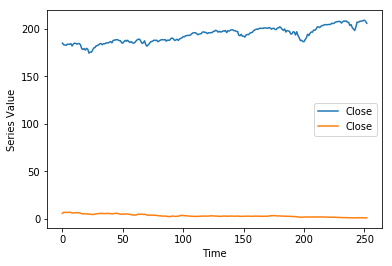

In [20]:
plt.plot(X1.index, X1.values)
plt.plot(X1.index, X2.values)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([X1.name, X2.name]);

In [21]:
# Calculate beta by using OLS
import statsmodels.api as sm
X1 = sm.add_constant(X1)
results = sm.OLS(X2, X1).fit()
# Get rid of the constant column
X1 = X1['Close']

results.params

const    32.452285
Close    -0.149694
dtype: float64

It is likely stationary with p-value: 0.0037490742649722753.


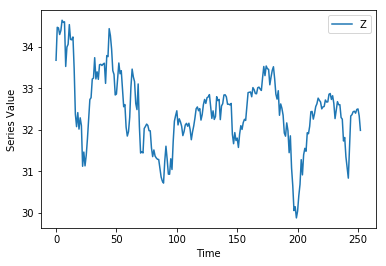

In [22]:
b = results.params['Close']
Z = X2 - b * X1
Z.name = 'Z'

plt.plot(Z.index, Z.values)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([Z.name]);

test_stationary(Z);

We can see here that the resulting  Z  was likely stationary over the time frame we looked at. This causes us to accept the hypothesis that our two assets were cointegrated over the same timeframe.

### coint() in statsmodels.tsa.stattools
There's a pre-built tests for cointegration from statsmodels module.

In [23]:
from statsmodels.tsa.stattools import coint
# H_0: No cointegration. 
# P.S Assume two variable are I(1).

'''
def coint(y0, y1, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None):
---Returns----
    coint_t : float
        t-statistic of unit-root test on residuals
    pvalue : float
        MacKinnon's approximate, asymptotic p-value based on MacKinnon (1994)
    crit_value : dict
        Critical values for the test statistic at the 1 %, 5 %, and 10 %
        levels based on regression curve. This depends on the number of
        observations.
-------        
If pvalue > significance -> accept H_0
If pvalue < significance -> reject H_0
'''
coint(X1, X2)

(-3.2249425589247895,
 0.065854688946718948,
 array([-3.94042787, -3.36048387, -3.06132299]))